Module 5 Case study 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data - HollywoodMovies.csv

mdf = pd.read_csv('1937_m5_datasets_v1_721_pp8jgl2/HollywoodMovies.csv')
mdf.shape

(970, 16)

In [4]:
mdf.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [5]:
# Data maipulation

#1 highest rated movie in Quest story type

qdf = mdf[mdf['Story'] == 'Quest']
print(qdf[ qdf['AudienceScore'] == qdf['AudienceScore'].max()]['Movie'])


417    Harry Potter and the Deathly Hallows Part 1
629                                    The Muppets
Name: Movie, dtype: object


In [6]:
#2 genre which had highest no. of movie releases

print('Genre with the highest no. of movie releases is', mdf['Genre'].value_counts().index[0], 'with ', mdf['Genre'].value_counts().iloc[0], 'releases.')

#print('Genre with the highest no. of movie releases is', mdf['Genre'].value_counts().idxmax())

Genre with the highest no. of movie releases is Comedy with  177 releases.


In [32]:
# 3 names of top 5 movies with expensive budgets

big_budget = mdf[['Movie','Budget']]
big_budget = big_budget.sort_values('Budget', ascending=False).head(5)
print(big_budget)

                                        Movie  Budget
3    Pirates of the Caribbean: At World's End   300.0
468                                   Tangled   260.0
0                                Spider-Man 3   258.0
710                               John Carter   250.0
778                     The Dark Knight Rises   250.0


In [ ]:
# explore

# top most big budget movie
#big_budget = mdf[mdf['Budget'] == mdf['Budget'].max()]
# movie = big_budget['Movie'].to_string(index=False)
# budget = big_budget['Budget'].to_string(index=False)
# print(f"Top 5 movies with expensive budget {movie} with budget being {budget}")

# #1
# for movie, budget in zip(big_budget['Movie'], big_budget['Budget']):
#     print(f"{movie} with a budget of {budget}")

# #2
# big_budget = mdf[['Movie', 'Budget']]
# big_budget = big_budget.sort_values(by='Budget', ascending=False).head(5)

# # Use .iterrows() to iterate through rows
# for _, row in big_budget.iterrows():
#     print(f"{row['Movie']} with a budget of {row['Budget']}")

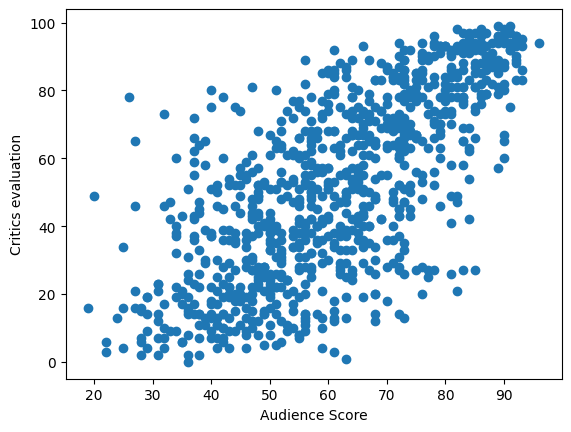

Audience Score and Critics evaluation show high correlation

                AudienceScore  RottenTomatoes
AudienceScore        1.000000        0.702908
RottenTomatoes       0.702908        1.000000


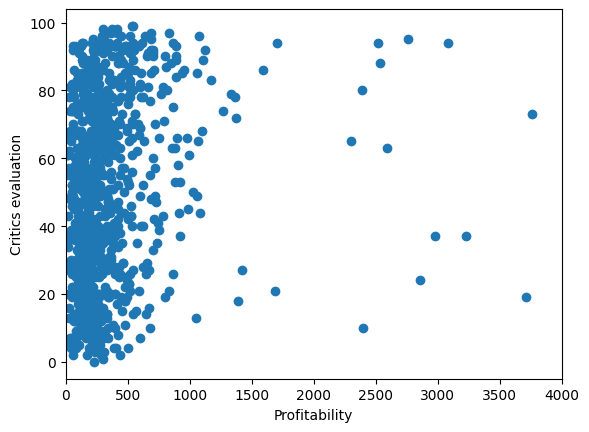

Movies with negative ratings had lesser profits as compared to movies with positive ratings


In [42]:
# 4 any correspondence between the critics’ evaluation of a movie and its acceptance by the public? Find out, by plotting the net profitability of a movie against the ratings it receives on Rotten Tomatoes

plt.scatter(mdf['AudienceScore'],mdf['RottenTomatoes'])
plt.xlabel('Audience Score')
plt.ylabel('Critics evaluation')
plt.show()
print('Audience Score and Critics evaluation show high correlation\n')

# correlation 
corrdf = mdf[['AudienceScore','RottenTomatoes']]
print(corrdf.corr())

plt.scatter(mdf['Profitability'],mdf['RottenTomatoes'])
plt.xlim(0,4000)
plt.xlabel('Profitability')
plt.ylabel('Critics evaluation')
plt.show()
print('Movies with negative ratings had lesser profits as compared to movies with positive ratings')

In [10]:
#5.1 create a df

data = {
    'first_name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
'last_name': ['Miller', 'Jacobson', ".", 'Milner', 'Cooze'],
 'age': [42, 52, 36, 24, 73],
   'preTestScore': [4, 24, 31, ".", "."],
   'postTestScore': ["25,000", "94,000", 57, 62, 70]
}

df = pd.DataFrame(data)
df

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,"25,000"
1,Molly,Jacobson,52,24,"94,000"
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [11]:
#5.2 save as example.csv

df.to_csv('Example.csv', index=False)

In [12]:
#5.3 read example.csv and print df

example_df = pd.read_csv('Example.csv')
print(example_df)

  first_name last_name  age preTestScore postTestScore
0      Jason    Miller   42            4        25,000
1      Molly  Jacobson   52           24        94,000
2       Tina         .   36           31            57
3       Jake    Milner   24            .            62
4        Amy     Cooze   73            .            70


In [13]:
#5.4 read the example.csv without column heading

example_df2 = pd.read_csv('Example.csv', skiprows=1)  #skip rows to omit the headers; column headers lying in 1st row
print(example_df2)

#example_df2 = pd.read_csv('Example.csv', header=None)  #header=None treats the 1st row of headers as a data; headers contain number indexing
#print(example_df2)


   Jason    Miller  42   4  25,000
0  Molly  Jacobson  52  24  94,000
1   Tina         .  36  31      57
2   Jake    Milner  24   .      62
3    Amy     Cooze  73   .      70


In [14]:
#5.5 read with index columns 'first name' and 'last name'

example_df3 = pd.read_csv('Example.csv', index_col=(0,1))
print(example_df3)

#alternate way
example_df3 = pd.read_csv('Example.csv')
example_df3.set_index(['first_name', 'last_name'], inplace=True)
print(example_df3)


                      age preTestScore postTestScore
first_name last_name                                
Jason      Miller      42            4        25,000
Molly      Jacobson    52           24        94,000
Tina       .           36           31            57
Jake       Milner      24            .            62
Amy        Cooze       73            .            70
                      age preTestScore postTestScore
first_name last_name                                
Jason      Miller      42            4        25,000
Molly      Jacobson    52           24        94,000
Tina       .           36           31            57
Jake       Milner      24            .            62
Amy        Cooze       73            .            70


In [15]:
#5.6 print the dataframe in boolean form - True for NaN/null values, False for non null values

print(example_df.isnull())

#print(example_df.isna().sum())  for representation

   first_name  last_name    age  preTestScore  postTestScore
0       False      False  False         False          False
1       False      False  False         False          False
2       False      False  False         False          False
3       False      False  False         False          False
4       False      False  False         False          False


In [16]:
#5.7 read the data by skipping 1st 3 rows and print the df

example_df4 = pd.read_csv('Example.csv', skiprows=[1,2,3])  # keeping the column headers intact
example_df4


,first_name,last_name,age,preTestScore,postTestScore
0,Jake,Milner,24,.,62
1,Amy,Cooze,73,.,70


In [17]:
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     5 non-null      object
 1   last_name      5 non-null      object
 2   age            5 non-null      int64 
 3   preTestScore   5 non-null      object
 4   postTestScore  5 non-null      object
dtypes: int64(1), object(4)
memory usage: 332.0+ bytes


In [18]:
#5.8  Read csv ignoring the commas in postTestScore

new_df = pd.read_csv('Example.csv', thousands=',')    # thousands parameter
new_df

# df = pd.read_csv('Example.csv', dtype={'postTestScore': 'int64'}) to change data type while reading

,first_name,last_name,age,preTestScore,postTestScore
0,Jason,Miller,42,4,25000
1,Molly,Jacobson,52,24,94000
2,Tina,.,36,31,57
3,Jake,Milner,24,.,62
4,Amy,Cooze,73,.,70


In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   first_name     5 non-null      object
 1   last_name      5 non-null      object
 2   age            5 non-null      int64 
 3   preTestScore   5 non-null      object
 4   postTestScore  5 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 332.0+ bytes


In [20]:
#6.1 Create a series
# uppercase, lowercase and len operations

data = ['Amit', 'Bob', 'Kate', 'A', 'b', np.nan, 'Car', 'dog', 'cat']
srs = pd.Series(data)
srs       

#a print all elements in lower case
print('Series in lowercase\n',srs.str.lower())

#b print all elements in upper case
print('Series in uppercase\n',srs.str.upper())

#c print the length of all elements
print('Length of Series elements\n',srs.str.len())

Series in lowercase
 0    amit
1     bob
2    kate
3       a
4       b
5     NaN
6     car
7     dog
8     cat
dtype: object
Series in uppercase
 0    AMIT
1     BOB
2    KATE
3       A
4       B
5     NaN
6     CAR
7     DOG
8     CAT
dtype: object
Length of Series elements
 0    4.0
1    3.0
2    4.0
3    1.0
4    1.0
5    NaN
6    3.0
7    3.0
8    3.0
dtype: float64


In [21]:
#6.2 create a series
# trim, lstrip, rstrip

srs2 = pd.Series([' Atul', 'John ', ' jack ', 'Sam'])

#a Print all elements after stripping spaces from the left and right
print('Using strip()\n', srs2.str.strip())

#b Print all the elements after removing spaces from the left only
print('Using lstrip()\n', srs2.str.lstrip())

#c Print all the elements after removing spaces from the right only
print('Using rstrip()\n', srs2.str.rstrip())

Using strip()
 0    Atul
1    John
2    jack
3     Sam
dtype: object
Using lstrip()
 0     Atul
1    John 
2    jack 
3      Sam
dtype: object
Using rstrip()
 0     Atul
1     John
2     jack
3      Sam
dtype: object


In [22]:
#6.3  split, print series elements, split by '_' and return elements rather than a list

srs3 = pd.Series(['India_is_big', 'Population_is_huge', np.nan, 'Has_diverse_culture'])

# a)split the individual strings wherever ‘_’ comes and create a list out of it.
value = srs3.str.split('_')
print("Split by '_':\n", value.tolist())

# b)Access the individual elements of a list
for ele in value.dropna(): 
    for i in ele: print(i)

print('\n')
# c)Expand the elements so that all individual elements get splitby ‘_’ and instead of list returns individual elements
value1 = srs3.str.split('_')
for ele in value1.dropna(): 
    for i in ele: print(i)

# alternate way
print(srs3.str.split('_', expand=True))

Split by '_':
 [['India', 'is', 'big'], ['Population', 'is', 'huge'], nan, ['Has', 'diverse', 'culture']]
India
is
big
Population
is
huge
Has
diverse
culture


India
is
big
Population
is
huge
Has
diverse
culture
            0        1        2
0       India       is      big
1  Population       is     huge
2         NaN      NaN      NaN
3         Has  diverse  culture


In [23]:
#6.4 Create a series and replace either X or dog with XX-XX

srs4 = pd.Series(['A', 'B', 'C', 'AabX', 'BacX','', np.nan, 'CABA', 'dog', 'cat'])
print(srs4.replace(to_replace = ['X','dog'], value = 'XX-XX'))


0        A
1        B
2        C
3     AabX
4     BacX
5         
6      NaN
7     CABA
8    XX-XX
9      cat
dtype: object


In [24]:
#6.5 Create a series and remove the dollars from the numeric values

srs5 = pd.Series(['12', '-$10', '$10,000'])
srs5.str.replace('$','')


0        12
1       -10
2    10,000
dtype: object

In [25]:
#6.6 Create a series and reverse all lower case words
 
srs6 = pd.Series(['India1998', 'big country', np.nan])

for ele in srs6:
    if isinstance(ele,str) and str(ele).islower():
        print(ele[::-1])

# alternate method
print('\n')
print(srs6[srs6.str.islower() == True].str[::-1],'\n')

# to update in the series
reversedsrs = srs6.apply(lambda ele: ele[::-1] if isinstance(ele,str) and ele.islower() else ele)
print(reversedsrs,'\n')
# another way       # always handle for nan values
print(srs6.where(~(srs6.str.islower() & srs6.notna()),srs6.str[::-1] ))       # ! is not a python operator


yrtnuoc gib


1    yrtnuoc gib
dtype: object 

0      India1998
1    yrtnuoc gib
2            NaN
dtype: object 

0      India1998
1    yrtnuoc gib
2            NaN
dtype: object


In [26]:
#6.7 Create pandas series and print true if the value is alphanumeric in series or false if the value is not alphanumericin series

srs7 = pd.Series(['1', '2', '1a', '2b', '2003c'])
print(srs7.str.isalnum())

0    True
1    True
2    True
3    True
4    True
dtype: bool


In [27]:
#6.8 Create pandas series and print true if the value is containing ‘A’

srs8 = pd.Series(['1', '2', '1a', '2b', 'America', 'VietnAm','vietnam', '2003c'])
print(srs8.str.contains('A'))

print('\n')

# for getting just true values
for ele in srs8:
    if 'A' in ele:
        print(ele, 'True')
    else:
        continue

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
dtype: bool


America True
VietnAm True


In [28]:
#6.9 Create pandas series and print in three columns value 0 or 1 if a or b or c exists in values

srs9 = pd.Series(['a', 'a|b', np.nan, 'a|c'])
values = ['1 ' if  ('a' in ele or 'b' in ele or 'c' in ele) else '0 ' for ele in srs9.dropna().values]
print(''.join(values))
#srs9.str.contains('a|b|c')

1 1 1 


In [29]:
#6.10 Create pandas dataframe having keys and ltable and rtable
# Merge both the tables based onkey

left_df = pd.DataFrame({'key': ['One', 'Two'], 'ltable': [1, 2]})
right_df = pd.DataFrame({'key': ['One', 'Two'], 'rtable': [4, 5]})
print(left_df,'\n',right_df)

print(pd.merge(left_df,right_df,on='key'))


   key  ltable
0  One       1
1  Two       2 
    key  rtable
0  One       4
1  Two       5
   key  ltable  rtable
0  One       1       4
1  Two       2       5
